In [125]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
# Imports
import modules.imports as imports
import modules.visualisation as Visualisation   

# I. IMPORT DES DONNEES

## Team dataframe

In [39]:
teamdf = imports.create_teams_df()
teamdf
# teamdf.to_json('teamdf.json', orient='records')

,idteam,name
0,14,Liverpool
1,45,Norwich
2,91,Bournemouth
3,49,Sheffield
4,90,Burnley
...,...,...
5680,1737,Cadix
5691,2894,Huesca
6428,2000,Benevento
6433,744,Crotone


## Player dataframe

In [40]:
playerdf = imports.create_players_df()
playerdf
# playerdf.to_json('playerdf.json', orient='records')

,idplayer,lastname
0,15157,Milner
1,41733,Wijnaldum
2,56979,Henderson
3,60706,Adrián
4,60914,Matip
...,...,...
142256,173131,Haraslín
142280,518924,Bertini
142389,539223,Bertola
142390,539226,Pietra


## Match dataframe

In [123]:
matchdf = imports.create_matches_df()
matchdf
# matchdf.to_json('matchdf.json', orient='records')

,matchid,hometeam,awayteam,date,duration,period,chamionship,quotation_away,quotation_home,quotation_draw,home_formation,away_formation,home_score,away_score
0,match_1059702,Liverpool,Norwich,2019-08-09T19:00:00Z,93,FullTime,2.0,18.00,1.12,9.00,433,4231,4,1
1,match_1059703,Bournemouth,Sheffield,2019-08-10T14:00:00Z,95,FullTime,2.0,3.90,1.95,3.55,3421,352,1,1
2,match_1059704,Burnley,Southampton,2019-08-10T14:00:00Z,94,FullTime,2.0,2.75,2.65,3.15,442,3421,4,0
3,match_1059705,Crystal Palace,Everton,2019-08-10T14:00:00Z,95,FullTime,2.0,2.35,3.20,3.20,442,4231,0,0
4,match_1059706,Leicester,Wolverhampton,2019-08-11T13:00:00Z,95,FullTime,2.0,3.50,2.15,3.25,4141,352,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,match_2137737,Atalanta,Milan,2021-05-23T18:45:00Z,95,FullTime,5.0,2.60,2.35,3.98,3421,4231,0,2
3590,match_2137738,Sampdoria,Parma,2021-05-22T18:45:00Z,90,FullTime,5.0,3.70,1.55,3.80,532,352,3,0
3591,match_2137739,Spezia,Roma,2021-05-23T18:45:00Z,95,FullTime,5.0,1.58,4.65,4.65,433,4231,2,2
3592,match_2137740,Inter,Udinese,2021-05-23T13:00:00Z,90,FullTime,5.0,5.00,1.38,3.90,352,3511,5,1


## Highlight dataframe

In [ ]:
highlightsdf = imports.create_highlight_df()
highlightsdf
# highlightsdf.to_json('highlightsdf.json', orient='records')

,matchid,time,playerid,type
0,match_1059702,86,0,substitution
1,match_1059702,83,0,substitution
2,match_1059702,74,0,substitution
3,match_1059702,70,0,substitution
4,match_1059702,65,195546,yellow
...,...,...,...,...
50475,match_2137741,54,487053,yellow
50476,match_2137741,41,0,substitution
50477,match_2137741,38,141925,yellow
50478,match_2137741,32,430848,yellow


## Substitution dataframe

In [ ]:
substitutiondf = imports.create_substitutions_df()
substitutiondf
# substitutiondf.to_json('substitutiondf.json', orient='records')

,matchid,time,on_playerid,off_playerid,reason
0,match_1059702,39,60706,116535,Injury
1,match_1059702,74,110979,152760,Tactical
2,match_1059702,86,15157,92217,Tactical
3,match_1059702,58,87396,71738,Tactical
4,match_1059702,70,89470,90440,Tactical
...,...,...,...,...,...
25320,match_2137741,41,487053,141925,Injury
25321,match_2137741,63,94239,459089,Tactical
25322,match_2137741,63,192905,50401,Tactical
25323,match_2137741,76,483988,90557,Tactical


## Match Players dataframe


In [ ]:
matchdf_players = imports.create_match_players_df()
matchdf_players
# matchdf_players.to_json('match_playersdf.json', orient='records')

,matchid,teamid,playerid,position,formation_place,quotation_player,final_mark_2015,play_duration,touches,total_offside,...,bad_keeper_sweeper_point,six_second_violation_point,cross_not_claimed_point,penalty_save_point,assist_pass_lost,assist_handball_won,assist_free_kick_won,assist_penalty_won,pen_goals_conceded,pen_goals_conceded_point
0,match_1059702,14,15157,Midfielder,0,3.75,5.0,4,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,match_1059702,14,41733,Midfielder,8,4.40,5.5,90,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,match_1059702,14,56979,Midfielder,7,5.75,6.0,90,73.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,match_1059702,14,60706,Goalkeeper,0,0.00,4.5,51,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,match_1059702,14,60914,Defender,0,9.50,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142495,match_2137741,126,433734,Defender,0,0.00,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142496,match_2137741,126,459089,Goalkeeper,1,0.00,4.0,63,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142497,match_2137741,126,470501,Forward,0,4.65,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142498,match_2137741,126,483988,Defender,0,18.00,5.0,14,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# II. HISTORIQUE DES TRANSFERS 

In [ ]:
histoiquedf = imports.create_historique_transferts_df()
histoiquedf
histoiquedf.to_json('historiquedf.json', orient='records')

# III. REQUETES 

## A. Clubs 

In [ ]:
# • Afficher la liste de tous les clubs (idteam et nom du club) / Display the list of all teams in the dataframe
print(teamdf)

# • Convert 'idteam' column to integers
teamdf['idteam'] = teamdf['idteam'].astype(int)

# • Quel est le nom du club dont l'id est 43 ? / Display the club with where id = 43
print(teamdf[teamdf['idteam'] ==43])

# • Quel est le nombre total de clubs ? / Display the length of the team dataframe
print(len(teamdf))

     idteam         name
0        14    Liverpool
1        45      Norwich
2        91  Bournemouth
3        49    Sheffield
4        90      Burnley
...     ...          ...
5680   1737        Cadix
5691   2894       Huesca
6428   2000    Benevento
6433    744      Crotone
6445   2036       Spezia

[111 rows x 2 columns]
    idteam       name
15      43  Man. City
111


## B. Joueurs

In [ ]:
# • Afficher la liste des joueurs / List of all players
print(playerdf)

# • Quel est le nombre total de joueurs ? / Display the length of the player dataframe
print(len(playerdf))

       idplayer   lastname
0         15157     Milner
1         41733  Wijnaldum
2         56979  Henderson
3         60706     Adrián
4         60914      Matip
...         ...        ...
142256   173131   Haraslín
142280   518924    Bertini
142389   539223    Bertola
142390   539226     Pietra
142453   538794      Basha

[4503 rows x 2 columns]
4503


## C. Matchs

In [ ]:
# • Afficher la liste des matchs joués / List of all matches
print(matchdf)

# • Afficher tous les id des matchs où le club à domicile est Arsenal / Display all match ids where the home team is Arsenal
matchdf['hometeam'] = matchdf['hometeam'].astype(str)
arsenal_home_matches = matchdf[matchdf['hometeam'] == 'Arsenal']['matchid']
print(arsenal_home_matches)

# • Afficher les information du/des match(s) qui se sont déroulés le 11-08-2019. / Display the information of the match(es) that took place on 11-08-2019. 
matchdf['date'] = imports.pd.to_datetime(matchdf['date'])
print(matchdf[matchdf['date'].dt.date == imports.pd.to_datetime('2019-08-11').date()])

# • Combien de matchs ont eu lieu en 2019 ? / How many matches took place in 2019?
print(len(matchdf[matchdf['date'].dt.year == 2019]))

# • Combien de matchs a joué le club Liverpool ? / How many matches did Liverpool play?
print(len(matchdf[(matchdf['hometeam'] == 'Liverpool') | (matchdf['awayteam'] == 'Liverpool')]))


            matchid        hometeam       awayteam                  date  \
0     match_1059702       Liverpool        Norwich  2019-08-09T19:00:00Z   
1     match_1059703     Bournemouth      Sheffield  2019-08-10T14:00:00Z   
2     match_1059704         Burnley    Southampton  2019-08-10T14:00:00Z   
3     match_1059705  Crystal Palace        Everton  2019-08-10T14:00:00Z   
4     match_1059706       Leicester  Wolverhampton  2019-08-11T13:00:00Z   
...             ...             ...            ...                   ...   
3589  match_2137737        Atalanta          Milan  2021-05-23T18:45:00Z   
3590  match_2137738       Sampdoria          Parma  2021-05-22T18:45:00Z   
3591  match_2137739          Spezia           Roma  2021-05-23T18:45:00Z   
3592  match_2137740           Inter        Udinese  2021-05-23T13:00:00Z   
3593  match_2137741          Napoli         Verona  2021-05-23T18:45:00Z   

      duration    period  chamionship  quotation_away  quotation_home  \
0           93

# IV. ANALYSE ET VISUALISATION GRAPHIQUE 

## A. Résultats en fonction du club

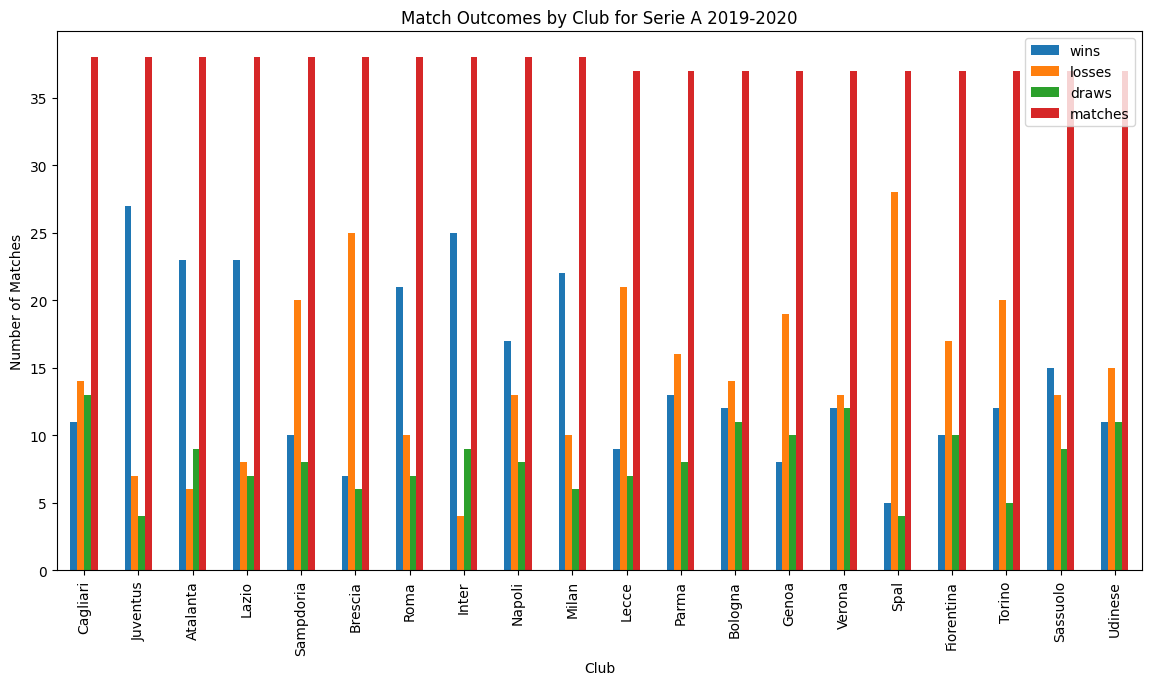

In [48]:
"""
• Afficher le nombre de matchs par club pour le championnat 5 pour la saison 
2019-2020 (dont victoire, défaite, math nul) (visualisation) Les dates du 
championnat 5 (Série A) pour la saison 2019-2020 sont 24 août 2019 - 2 août 
2020 
"""
# Apply the function for Serie A 2019-2020
serie_a_results = Visualisation.analyze_matches(matchdf, '2019-08-24', '2020-08-02', 5)

# Plotting
serie_a_results.sort_values('matches', ascending=False).plot(kind='bar', figsize=(14, 7))
Visualisation.plt.title('Match Outcomes by Club for Serie A 2019-2020')
Visualisation.plt.xlabel('Club')
Visualisation.plt.ylabel('Number of Matches')
Visualisation.plt.show()


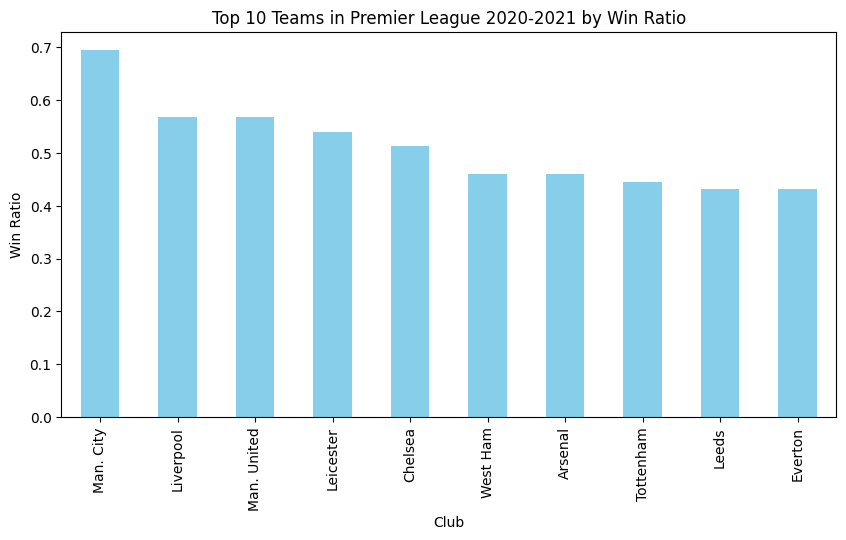

In [49]:
"""
• Afficher les 10 meilleures équipes pour le championnat 2 de la saison 2020
2021 (celles avec le meilleur ratio victoire/matchs joués) Les dates du 
championnat 2 (Premier League) pour la saison 2020-2021 sont du 12 
septembre 2020 au 23 mai 2021.
"""

# Apply the function for Premier League 2020-2021
pl_results = Visualisation.analyze_matches(matchdf, '2020-09-12', '2021-05-23', 2)
pl_results['win_ratio'] = pl_results['wins'] / pl_results['matches']

# Determine top 10 teams based on win ratio
top_teams = pl_results.sort_values('win_ratio', ascending=False).head(10)

# Plotting
top_teams['win_ratio'].plot(kind='bar', color='skyblue', figsize=(10, 5))
Visualisation.plt.title('Top 10 Teams in Premier League 2020-2021 by Win Ratio')
Visualisation.plt.xlabel('Club')
Visualisation.plt.ylabel('Win Ratio')
Visualisation.plt.show()

## B. Analyse des performances du joueur Messi 

In [ ]:
'''
• Est-ce que ce joueur fait partie des meilleurs butteurs dans son championnat ? 
• Pour cela, afficher les 10 meilleurs buteurs de son championnat (idplayer,nom, 
nombre de buts) (requête). (=> championnat = 3 et oui, il s'agit du meilleur 
butteur de son championnat) 
'''

In [60]:
# • Quel est l'id de ce joueur ? (requête) / What is the id of this player?
messi_data = playerdf[playerdf['lastname'] == 'Messi']
messi_id = (messi_data['idplayer'].iloc[0])
print(messi_id)

In [68]:
# • A quel(s) club(s) appartient ce joueur ? (requête) / To which club(s) does this player belong?
player_teams = matchdf_players[matchdf_players['playerid'] == messi_id]
messi_team_id = (player_teams['teamid'].unique())
print(messi_team_id)

for team in messi_team_id:
    print(teamdf[teamdf['idteam'] == team]['name'])

['178']
1881    Barcelona
Name: name, dtype: object


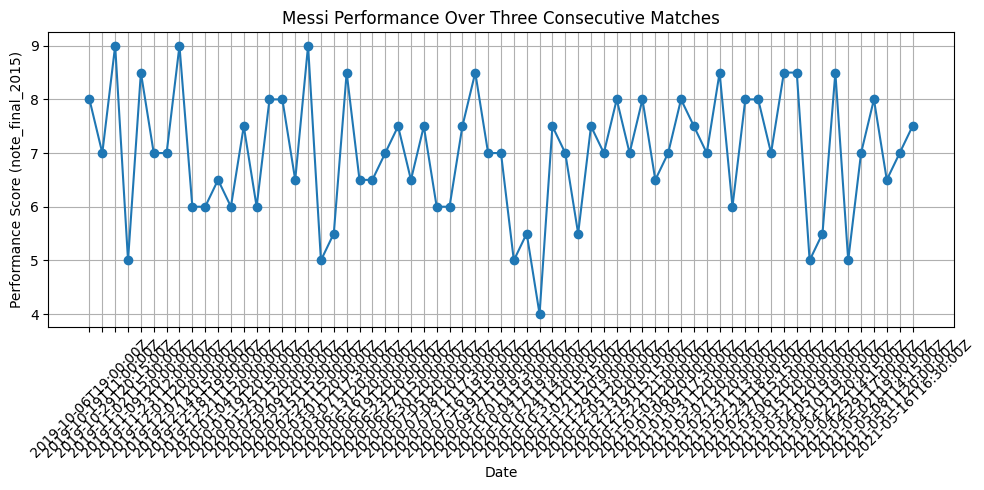

In [76]:
'''
• Calculer les performances (note_final_2015) de ce joueur sur trois matchs 
consécutifs et afficher l'évolution en fonction du temps. (visualisation) 
'''
combined_df = imports.pd.merge(matchdf_players, matchdf[['matchid', 'date', 'chamionship']], on='matchid')

# Filter data for Lionel Messi

messi_performances = combined_df[combined_df['playerid'] == messi_id]

# Sort by date to ensure the order of matches
messi_performances = messi_performances.sort_values('date')

messi_performances['rolling_avg'] = messi_performances['final_mark_2015'].rolling(window=3, min_periods=3).mean()

messi_performances.dropna(subset=['rolling_avg'], inplace=True)

# Visualizing Messi's performance over these three matches
Visualisation.plt.figure(figsize=(10, 5))
Visualisation.plt.plot(messi_performances['date'], messi_performances['final_mark_2015'], marker='o', linestyle='-')
Visualisation.plt.title('Messi Performance Over Three Consecutive Matches')
Visualisation.plt.xlabel('Date')
Visualisation.plt.ylabel('Performance Score (note_final_2015)')
Visualisation.plt.grid(True)
Visualisation.plt.xticks(rotation=45) 
Visualisation.plt.tight_layout()
Visualisation.plt.show()

In [77]:
# • Combien de cartons (rouge et jaune) a eu ce joueur ? / How many cards (red and yellow) did this player receive?
messi_cards = messi_performances[['yellow', 'red_card']].sum()
print(messi_cards)

yellow      8.0
red_card    0.0
dtype: float64


In [89]:
# • Est-ce que ce joueur fait partie des meilleurs butteurs dans son championnat ? / Is this player one of the top scorers in his league?
# • Pour cela, afficher les 10 meilleurs buteurs de son championnat (idplayer, nom, nombre de buts) (requête). (=> championnat = 3 et oui, il s'agit du meilleur butteur de son championnat)

scorers_df = imports.pd.merge(combined_df, playerdf, left_on='playerid', right_on='idplayer', how='left')
championship_id = 3  

top_scorers = scorers_df[scorers_df['chamionship'] == championship_id].groupby('playerid').agg({
    'lastname': 'first',  
    'goals': 'sum'
}).nlargest(10, 'goals')

print(top_scorers)

# Check if Messi is in the top scorers list
is_messi_top_scorer = messi_id in top_scorers.index
print(is_messi_top_scorer)

            lastname  goals
playerid                   
93721         Moreno   82.0
39336         Suárez   74.0
19054          Messi   55.0
19927        Benzema   42.0
215206    Maxi Gómez   34.0
40270          Aspas   28.0
219168          Isak   26.0
234991     En-Nesyri   26.0
166552         Fekir   24.0
197334      Williams   24.0
True


## C. Analyse des statistiques des clubs Liverpool et Arsenal 

In [90]:
# • Quels sont les team_id des clubs Liverpool et Arsenal
liverpool_id = teamdf[teamdf['name'] == 'Liverpool']['idteam'].iloc[0]
arsenal_id = teamdf[teamdf['name'] == 'Arsenal']['idteam'].iloc[0]

print(liverpool_id, arsenal_id)

14 3


In [99]:
# • Afficher la liste des joueurs du club Arsenal (id, nom) / Display the list of players from Arsenal

arsenal_players_df = imports.pd.merge(playerdf, matchdf_players, left_on='idplayer', right_on='playerid', how='left')
arsenal_players = (arsenal_players_df[arsenal_players_df['teamid'] == arsenal_id][['idplayer', 'lastname']]).drop_duplicates()
print(arsenal_players)

       idplayer            lastname
4522      58822       Cédric Soares
13180    131897                Ryan
18436     38411             Monreal
18503     39476            Sokratis
18535     41270          David Luiz
18593     54694          Aubameyang
18661     57249          Mkhitaryan
18723     59966           Lacazette
18793     80201                Leno
18860     84450               Xhaka
18924     98980            Martínez
19000    101184            Chambers
19037    154043      Maitland-Niles
19099    182539       Dani Ceballos
19162    195735                Pépé
19234    198849            Torreira
19299    200089         Joe Willock
19366    200641              Nelson
19399    242166           Guendouzi
19428    444145  Gabriel Martinelli
19475    111457           Kolasinac
19799     47431             Willian
21183     37605                Özil
22478    223340                Saka
23142    156074             Holding
23222    192895             Tierney
23692     98745            B

In [114]:
# Est-ce qu'il existe un match opposant Liverpool et Arsenal ? Si oui, quel est le score de ce(s) match(s) ? 

matchesLV_df = imports.pd.merge(matchdf, matchdf_players, on='matchid', how='left')

matchesLV = matchesLV_df[((matchesLV_df['hometeam'] == 'Liverpool')&(matchesLV_df['awayteam'] == 'Arsenal')) | ((matchesLV_df['awayteam'] == 'Liverpool')&(matchesLV_df['hometeam'] == 'Arsenal'))].drop_duplicates()
unique_matches = matchesLV.drop_duplicates(subset=['matchid'])

print(unique_matches[['matchid', 'goals']])

# Et afficher les joueurs (id, position) du club Liverpool d'un de ses matchs. 
liverpool_matches = unique_matches[unique_matches['teamid'] == liverpool_id]

first_match_id = liverpool_matches['matchid'].iloc[0]

liverpool_players_for_first_match = matchesLV_df[(matchesLV_df['matchid'] == first_match_id) &
                                                 (matchesLV_df['teamid'] == liverpool_id)][['playerid', 'position']].drop_duplicates()

print(liverpool_players_for_first_match)

              matchid  goals
828     match_1059725    0.0
12837   match_1060052    0.0
95263   match_2128310    0.0
105443  match_2128576    0.0
    playerid    position
828    15157  Midfielder
829    39155  Midfielder
830    41733  Midfielder
831    56979  Midfielder
832    60706  Goalkeeper
833    60914    Defender
834    68312  Midfielder
835    81880  Midfielder
836    92217     Striker
837    97032    Defender
838   110979     Striker
839   116643  Midfielder
840   118748     Striker
841   122798    Defender
842   152760     Forward
843   169187    Defender
844   171287    Defender
845   200720  Goalkeeper


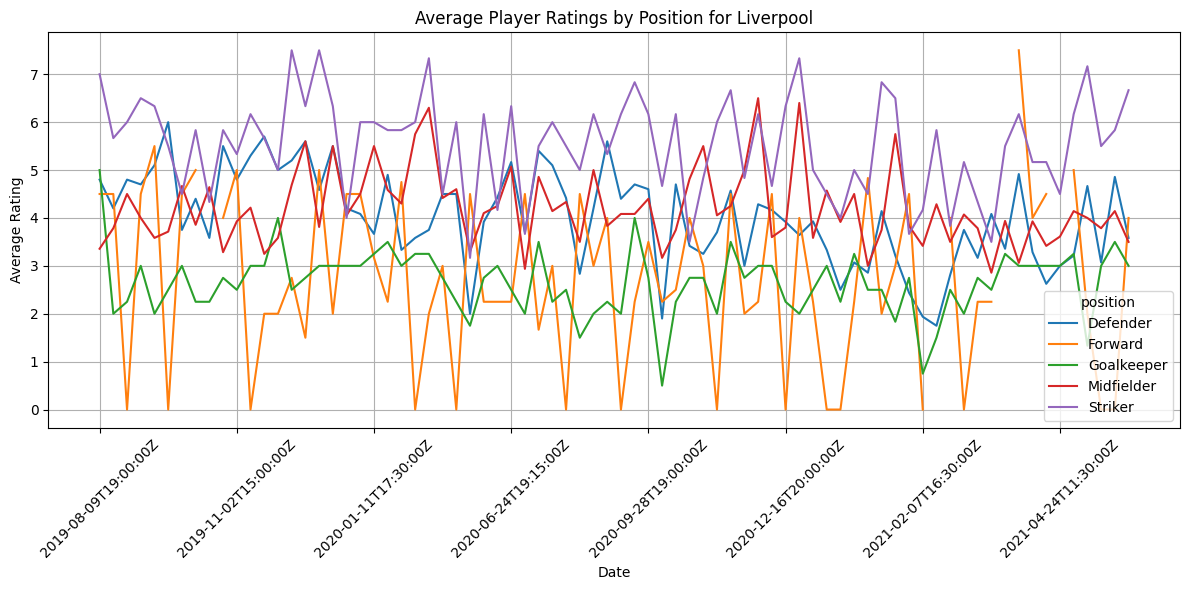

In [115]:
''' 
• Afficher l'évolution des notes (note_final_2015) moyennes des joueurs par 
position (defender, Midfielder...) en fonction du temps (visualisation) du club 
Liverpool. On pourra lier les postes forward et striker.
'''

# Filter data for Liverpool
liverpool_performances = matchesLV_df[matchesLV_df['teamid'] == liverpool_id]

# Group by position and date
liverpool_performances = liverpool_performances.groupby(['position', 'date']).agg({
    'final_mark_2015': 'mean'
}).reset_index()

# Rename forward to striker
liverpool_performances['position'] = liverpool_performances['position'].replace('forward', 'striker')

# Pivot the data for visualization
liverpool_performances = liverpool_performances.pivot(index='date', columns='position', values='final_mark_2015')

# Plotting
liverpool_performances.plot(figsize=(12, 6))
Visualisation.plt.title('Average Player Ratings by Position for Liverpool')
Visualisation.plt.xlabel('Date')
Visualisation.plt.ylabel('Average Rating')
Visualisation.plt.grid(True)
Visualisation.plt.xticks(rotation=45)
Visualisation.plt.tight_layout()
Visualisation.plt.show()



C:\Users\jaeln\AppData\Local\Temp\ipykernel_12916\1127055883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_matches['score_difference'] = unique_matches['home_score'] - unique_matches['away_score']


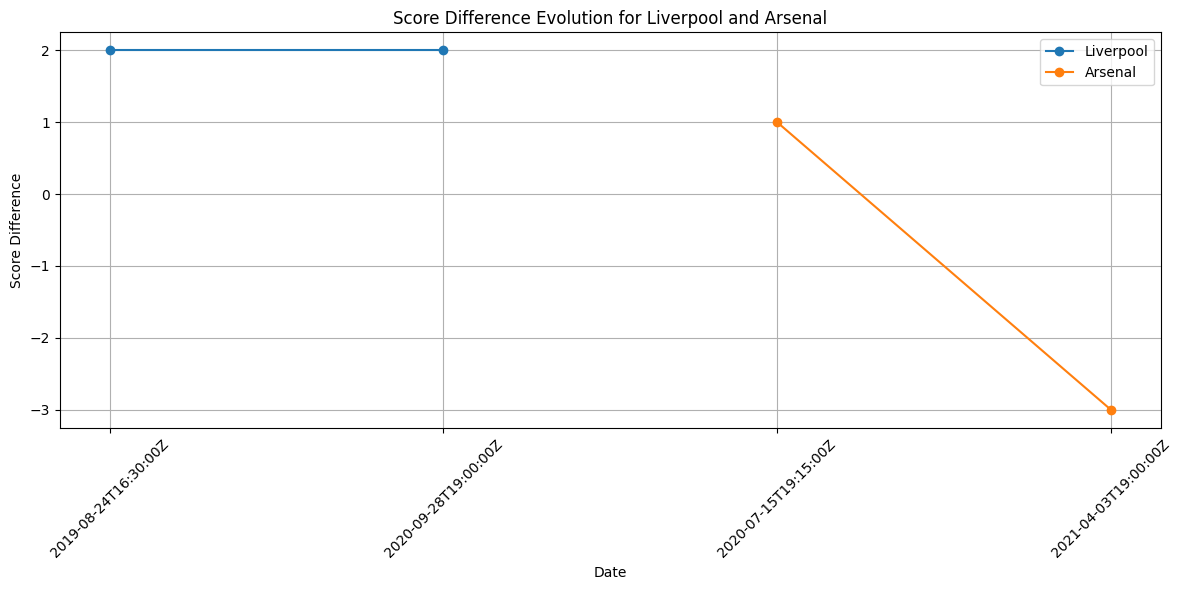

In [118]:
''' 
• Réaliser un graphique de l'évolution des écarts de résultats des clubs 
Liverpool et Arsenal (sur tous les matchs) en fonctions du temps (par ex : une 
victoire avec un score 3-2 correspondra à un score de 1; une défaite avec un 
score 1-4 correspondra à une score -3 ; un match nul correspond à un score 
0). 
'''

# Calculate the score difference for each match
unique_matches['score_difference'] = unique_matches['home_score'] - unique_matches['away_score']

# Filter data for Liverpool and Arsenal
liverpool_results = unique_matches[unique_matches['teamid'] == liverpool_id]
arsenal_results = unique_matches[unique_matches['teamid'] == arsenal_id]

# Plotting
Visualisation.plt.figure(figsize=(12, 6))
Visualisation.plt.plot(liverpool_results['date'], liverpool_results['score_difference'], marker='o', linestyle='-', label='Liverpool')
Visualisation.plt.plot(arsenal_results['date'], arsenal_results['score_difference'], marker='o', linestyle='-', label='Arsenal')
Visualisation.plt.title('Score Difference Evolution for Liverpool and Arsenal')
Visualisation.plt.xlabel('Date')
Visualisation.plt.ylabel('Score Difference')
Visualisation.plt.legend()
Visualisation.plt.grid(True)
Visualisation.plt.xticks(rotation=45)
Visualisation.plt.tight_layout()
Visualisation.plt.show()

In [120]:
# • Quels est le nombre moyen de changement par match pour le club Arsenal ? / What is the average score difference per match for Arsenal?


arsenal_matches = matchesLV_df[(matchesLV_df['hometeam'] == 'Arsenal') | (matchesLV_df['awayteam'] == 'Arsenal')]
arsenal_subs = substitutiondf[substitutiondf['matchid'].isin(arsenal_matches['matchid'])]

sub_count_per_match = arsenal_subs.groupby('matchid').size()

average_subs = sub_count_per_match.mean()

print(average_subs)

5.894736842105263


## D. Corrélation entre match à domicile et victoire

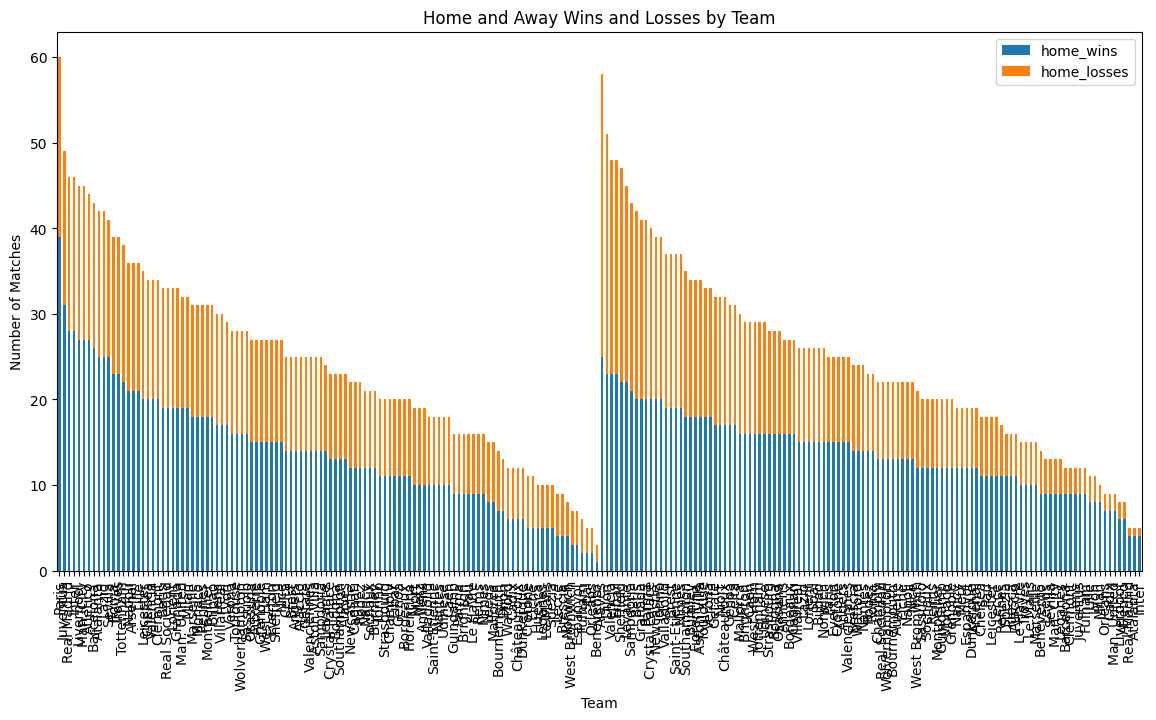

In [129]:
''' 
Existe-t-il une corrélation entre match à domicile et victoire ? Afficher le nombre de 
victoire/défaite en fonction des équipes à domicile (home) et invité (away). Est-ce 
qu'on observe une corrélation ?
'''

# Calculate the number of wins and losses for home and away teams
home_wins = matchdf[matchdf['home_score'] > matchdf['away_score']]
home_losses = matchdf[matchdf['home_score'] < matchdf['away_score']]
away_wins = matchdf[matchdf['home_score'] < matchdf['away_score']]
away_losses = matchdf[matchdf['home_score'] > matchdf['away_score']]
home_win_count = home_wins['hometeam'].value_counts()
home_loss_count = home_losses['hometeam'].value_counts()
away_win_count = away_wins['awayteam'].value_counts()
away_loss_count = away_losses['awayteam'].value_counts()

# Create a dataframe to visualize the results
results_df = imports.pd.DataFrame({
    'team': imports.pd.concat([home_win_count, away_loss_count]).index,
    'home_wins': imports.pd.concat([home_win_count, away_loss_count]).values,
    'home_losses': imports.pd.concat([home_loss_count, away_win_count]).values
})

# Plotting
results_df.plot(kind='bar', x='team', stacked=True, figsize=(14, 7))
Visualisation.plt.title('Home and Away Wins and Losses by Team')
Visualisation.plt.xlabel('Team')
Visualisation.plt.ylabel('Number of Matches')
Visualisation.plt.show()

## E. Paris sportif

AttributeError: module 'modules.imports' has no attribute 'np'

## F. Corrélation entre formation et victoire

KeyError: 'formation'